In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,Flatten,ReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from livelossplot.keras import PlotLossesCallback
%matplotlib inline

In [2]:
help(mnist)

Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    c:\users\singh\anaconda3\lib\site-packages\keras\datasets\mnist.py




In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

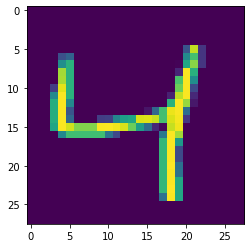

In [4]:
plt.imshow(x_train[2])

In [5]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[2]

4

In [7]:
print( x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [9]:
print( x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [12]:
num_classes = y_test.shape[1]
num_classes

10

In [20]:
def myModel():
    model=Sequential()
    model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
model=myModel()

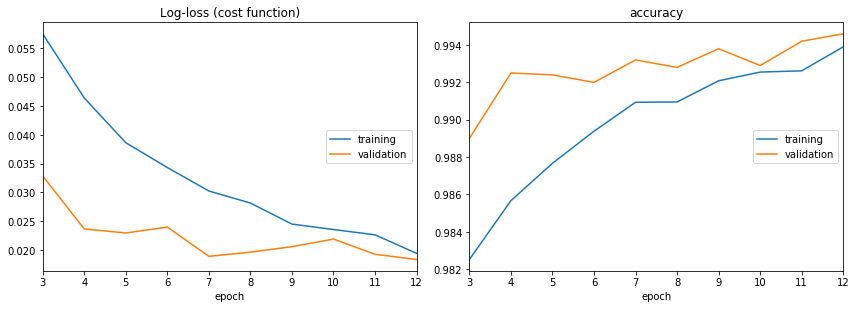

Log-loss (cost function):
training   (min:    0.019, max:    0.303, cur:    0.019)
validation (min:    0.018, max:    0.061, cur:    0.018)

accuracy:
training   (min:    0.902, max:    0.994, cur:    0.994)
validation (min:    0.979, max:    0.995, cur:    0.995)
CNN Error: 0.54%


In [22]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=12, batch_size=200,callbacks=[PlotLossesCallback()], verbose=2)
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [23]:
pwd

'C:\\Users\\singh'